In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"xosyasalassa","key":"ee817cad82445813c8cc05e7fb738509"}'}

In [2]:
#before importing the dataset we want to use this code
# The Kaggle API client expects this file to be in ~/.kaggle,
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

 98% 665M/675M [00:20<00:00, 27.5MB/s]
100% 675M/675M [00:20<00:00, 34.4MB/s]


In [4]:
!unzip "/content/cell_images.zip" -d "/content/cell_images"

Streaming output truncated to the last 5000 lines.
  inflating: /content/cell_images/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
  inflating: /content/cell_images/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
  inflating: /content/cell_images/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
  inflating: /content/cell_images/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
  inflating: /content/cell_images/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
  inflating: /content/cell_images/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
  inflating: /content/cell_images/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png  
  inflating: /content/cell_images/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_221.png  
  inflating: /content/cell_images/cel

In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("/content/cell_images/cell_images/cell_images"))

# Any results you write to the current directory are saved as output.

['Uninfected', 'Parasitized']


## Importing Neccessary Libraries

In [6]:
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
infected_data = os.listdir('/content/cell_images/cell_images/cell_images/Parasitized/')
print(infected_data[:10]) #the output we get are the .png files

uninfected_data = os.listdir('/content/cell_images/cell_images/cell_images/Uninfected/')
print('\n')
print(uninfected_data[:10])

['C136P97ThinF_IMG_20151005_142627_cell_18.png', 'C93P54ThinF_IMG_20150821_162901_cell_195.png', 'C176P137NThinF_IMG_20151201_122708_cell_138.png', 'C179P140ThinF_IMG_20151127_153819_cell_183.png', 'C68P29N_ThinF_IMG_20150819_134625_cell_7.png', 'C132P93ThinF_IMG_20151004_151941_cell_2.png', 'C85P46ThinF_IMG_20150820_110143_cell_239.png', 'C80P41ThinF_IMG_20150817_111943_cell_3.png', 'C184P145ThinF_IMG_20151203_102405_cell_161.png', 'C182P143NThinF_IMG_20151201_172842_cell_4.png']


['C12NThinF_IMG_20150614_124244_cell_109.png', 'C93P54ThinF_IMG_20150821_163452_cell_60.png', 'C227ThinF_IMG_20151112_135818_cell_266.png', 'C218ThinF_IMG_20151106_144337_cell_147.png', 'C101P62ThinF_IMG_20150918_151239_cell_69.png', 'C232ThinF_IMG_20151112_154345_cell_184.png', 'C107P68ThinF_IMG_20150924_222233_cell_66.png', 'C84P45ThinF_IMG_20150818_101146_cell_59.png', 'C63P24N_ThinF_IMG_20150818_143544_cell_46.png', 'C209ThinF_IMG_20151029_160721_cell_192.png']


## Visualization of Infected and Uninfected Cells

1. Infected Data

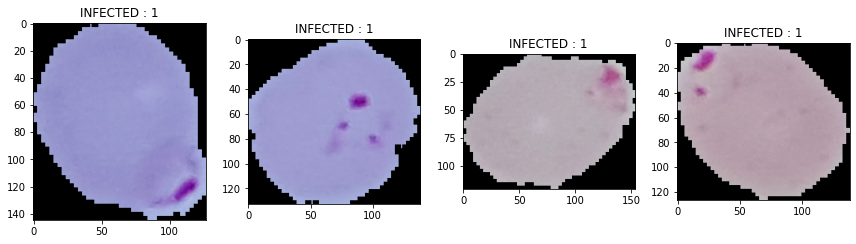

In [8]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('/content/cell_images/cell_images/cell_images/Parasitized' + "/" + infected_data[i])
    plt.imshow(img)
    plt.title('INFECTED : 1')
    plt.tight_layout()
plt.show()

2. Unifected Data

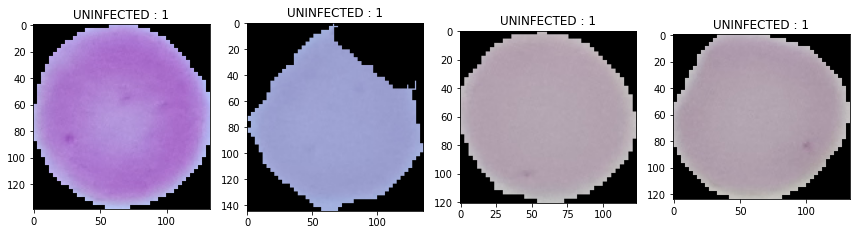

In [9]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('/content/cell_images/cell_images/cell_images/Uninfected' + "/" + uninfected_data[i])
    plt.imshow(img)
    plt.title('UNINFECTED : 1')
    plt.tight_layout()
plt.show()

In [10]:
data = []
labels = []
for img in infected_data:
    try:
        img_read = plt.imread('/content/cell_images/cell_images/cell_images/Parasitized/' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        img_aray=img_array/255
        data.append(img_array)
        labels.append(1)
    except:
        None
        
for img in uninfected_data:
    try:
        img_read = plt.imread('/content/cell_images/cell_images/cell_images/Uninfected' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        img_array= img_array/255
        data.append(img_array)
        labels.append(0)
    except:
        None

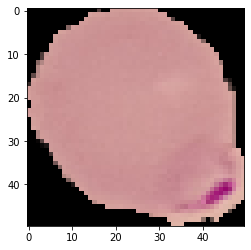

In [11]:
plt.imshow(data[0])
plt.show()

In [12]:
image_data = np.array(data)
labels = np.array(labels)
idx = np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data = image_data[idx]
labels = labels[idx]

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_data, labels, test_size = 0.2, random_state = 42)

In [14]:
y_train = np_utils.to_categorical(y_train,  2)
y_test = np_utils.to_categorical(y_test,  2)

In [15]:
print(f'Shape of training image : {x_train.shape}')
print(f'Shape of testing image : {x_test.shape}')
print(f'Shape of training labels : {y_train.shape}')
print(f'Shape of testing labels : {y_test.shape}')

Shape of training image : (22046, 50, 50, 3)
Shape of testing image : (5512, 50, 50, 3)
Shape of training labels : (22046, 2)
Shape of testing labels : (5512, 2)


## The Architecture of the CNN model

In [16]:
import keras
from keras.layers import Dense, Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras import backend as K

from keras import optimizers

In [17]:
inputShape= (50,50,3)
model=Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = inputShape))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization(axis =-1))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))

model.add(Flatten())
    
model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.5))
model.add(Dense(2, activation = 'softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 24, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 32)        1

In [19]:
#compile the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [20]:
H = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=25)

Epoch 1/25
689/689 [==============================] - 4s 5ms/step - loss: 0.0023 - accuracy: 0.9990 - val_loss: 1.3625e-06 - val_accuracy: 1.0000
Epoch 2/25
689/689 [==============================] - 3s 5ms/step - loss: 2.1521e-05 - accuracy: 1.0000 - val_loss: 3.6394e-07 - val_accuracy: 1.0000
Epoch 3/25
689/689 [==============================] - 3s 5ms/step - loss: 4.7836e-05 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/25
689/689 [==============================] - 3s 5ms/step - loss: 3.7533e-07 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/25
689/689 [==============================] - 3s 5ms/step - loss: 6.2762e-07 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/25
689/689 [==============================] - 3s 5ms/step - loss: 3.1005e-07 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/25
689/689 [==============================] - 3s 5ms/step - loss: 4.1771e-07 - accuracy: 1.0000 

In [21]:
print(H.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


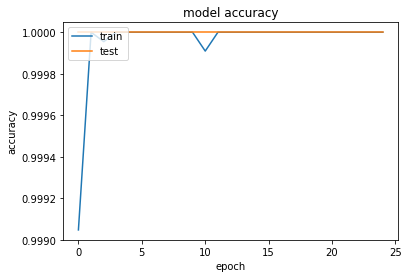

In [23]:
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

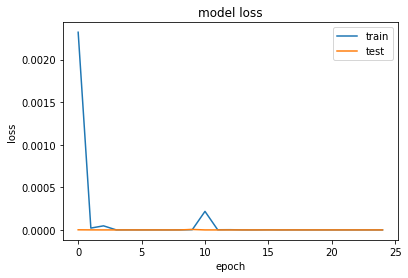

In [24]:
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()

In [25]:
# make predictions on the test set
preds = model.predict(x_test)

In [26]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test.argmax(axis=1), preds.argmax(axis=1)))

1.0


In [27]:

from sklearn.metrics import classification_report
print(classification_report(y_test.argmax(axis=1), preds.argmax(axis=1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2787
           1       1.00      1.00      1.00      2725

    accuracy                           1.00      5512
   macro avg       1.00      1.00      1.00      5512
weighted avg       1.00      1.00      1.00      5512



In [28]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    from sklearn.metrics import confusion_matrix
    from sklearn.utils.multiclass import unique_labels
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[2787    0]
 [   0 2725]]


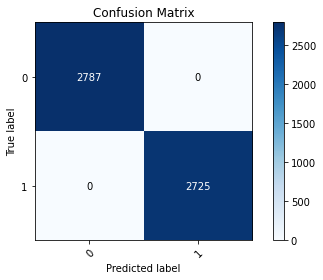

In [29]:
class_names=np.array((0,1))
plot_confusion_matrix(y_test.argmax(axis=1), preds.argmax(axis=1), classes=class_names, title='Confusion Matrix')